train data size (595212, 59)
test data size (892816, 58)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


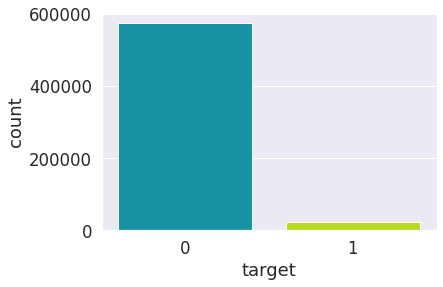

Nan values = 0


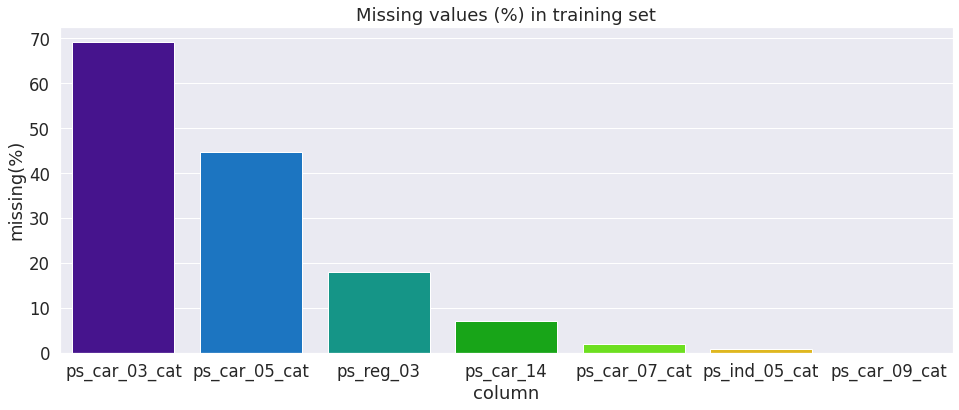

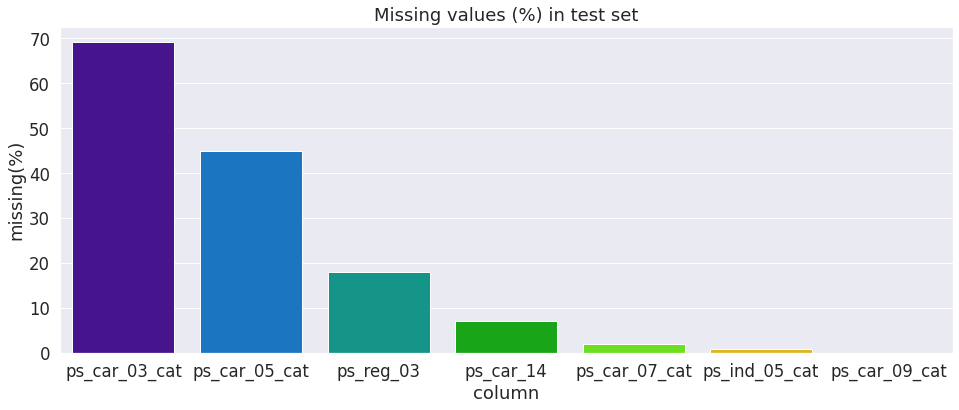

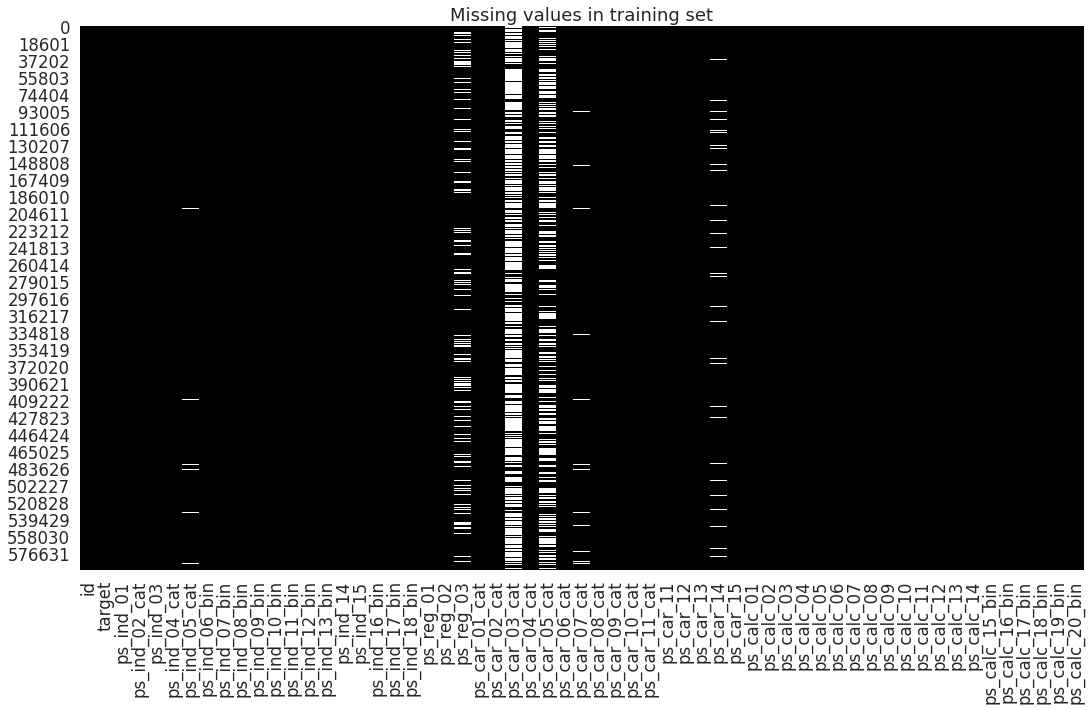

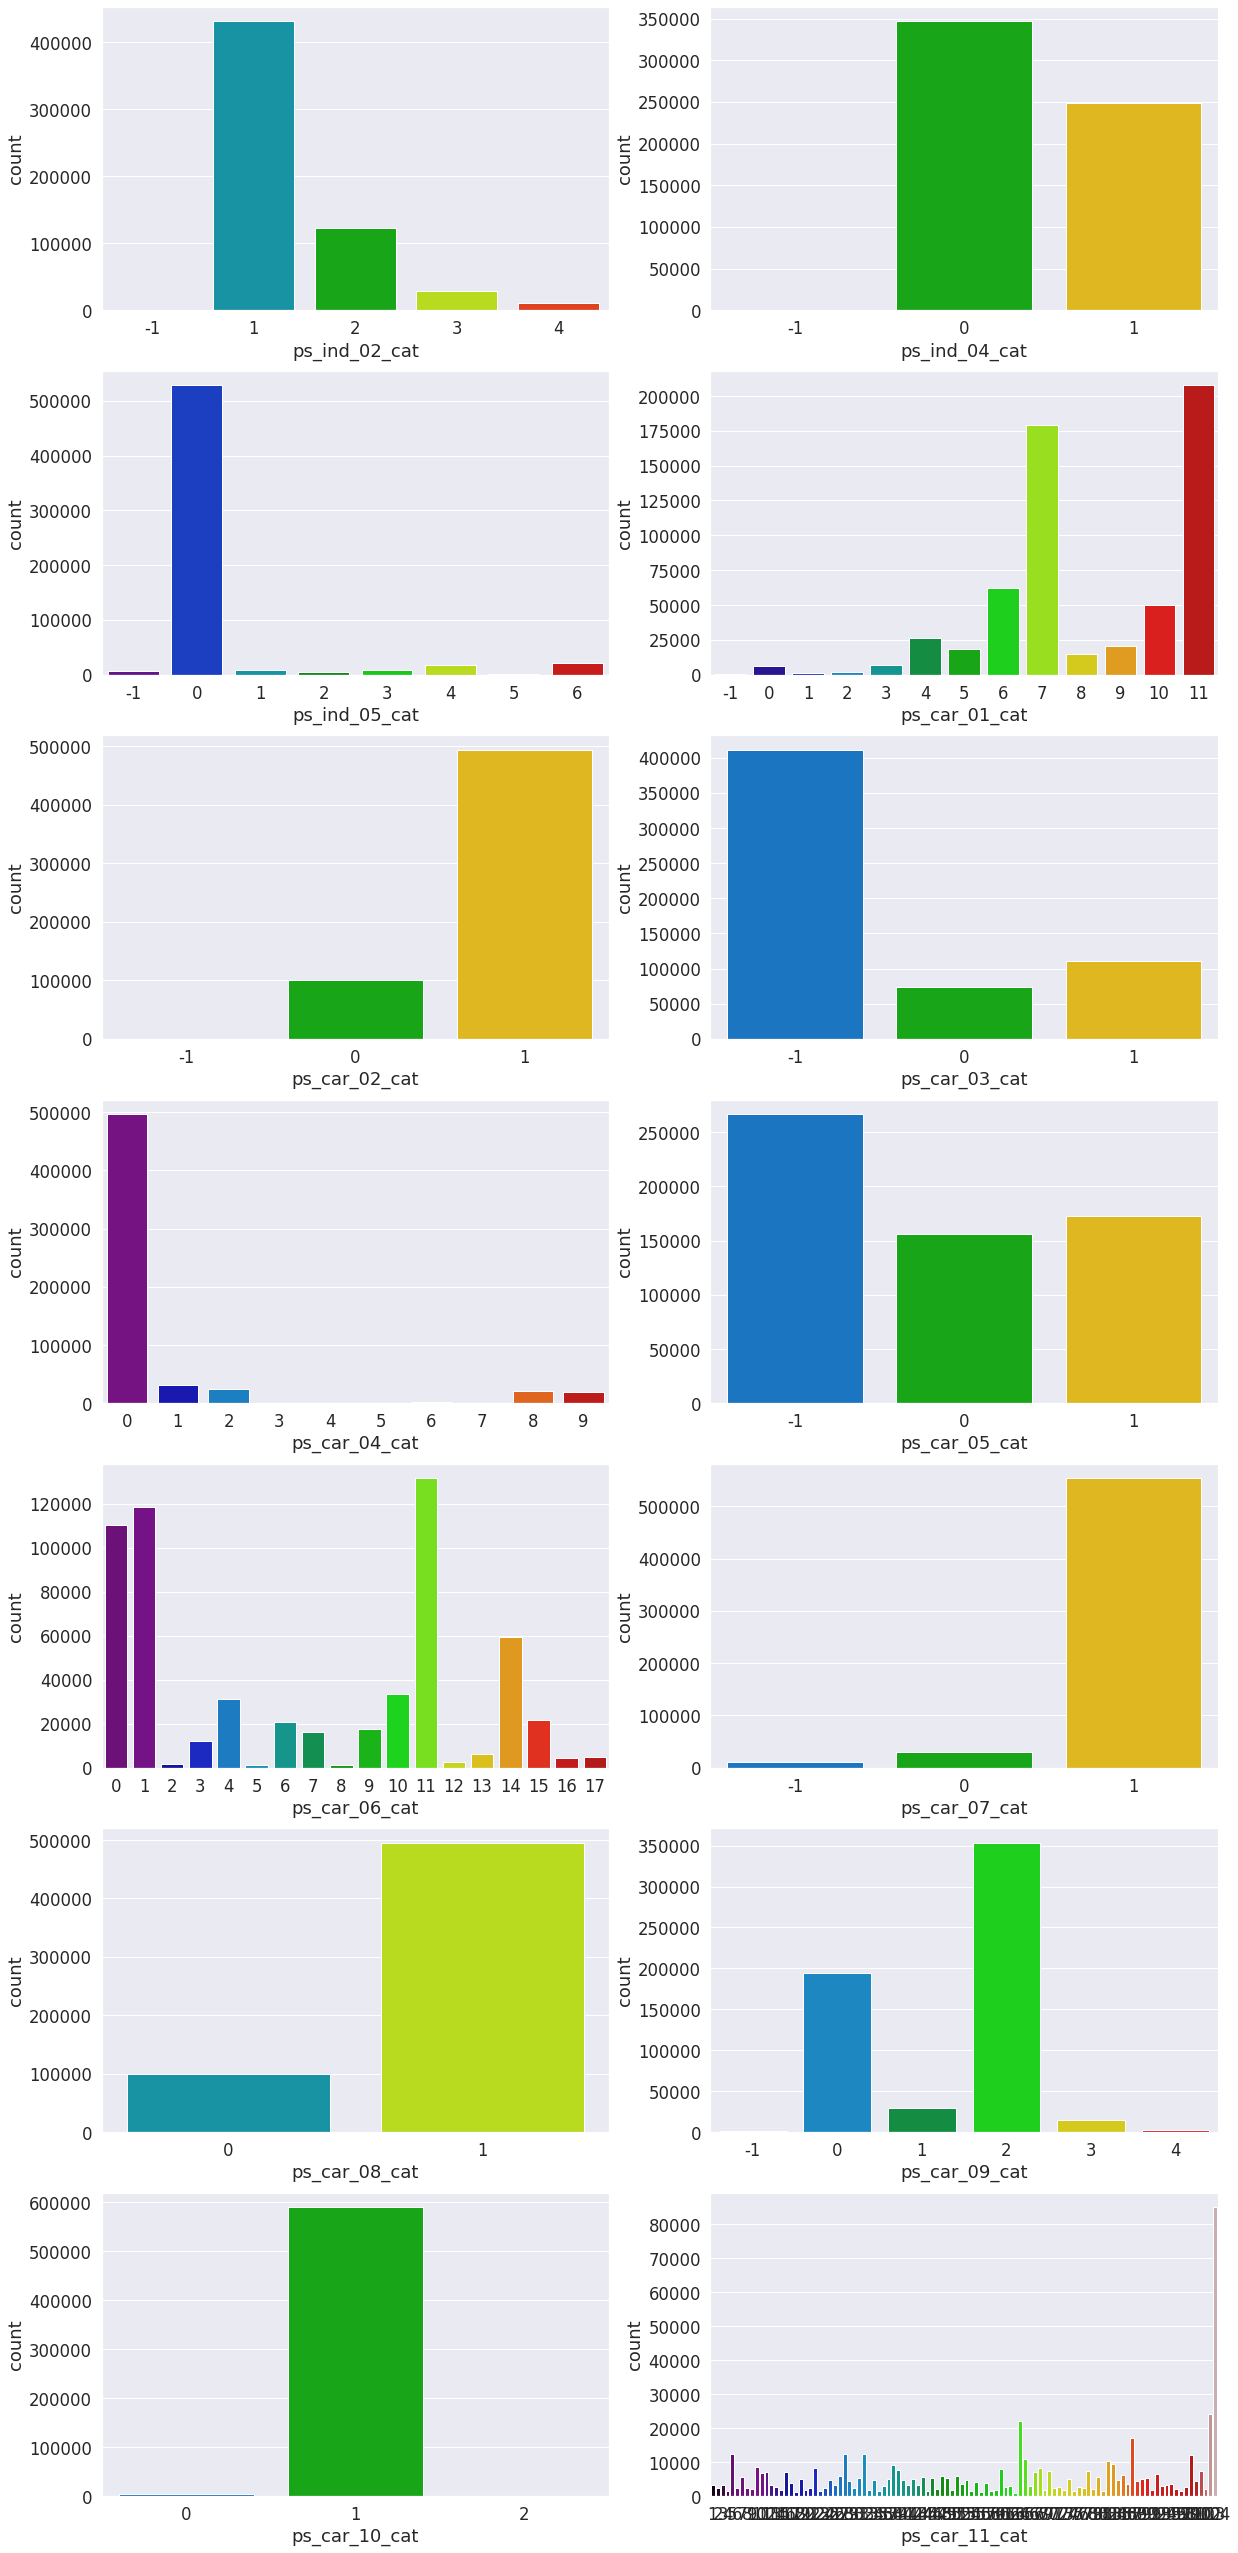

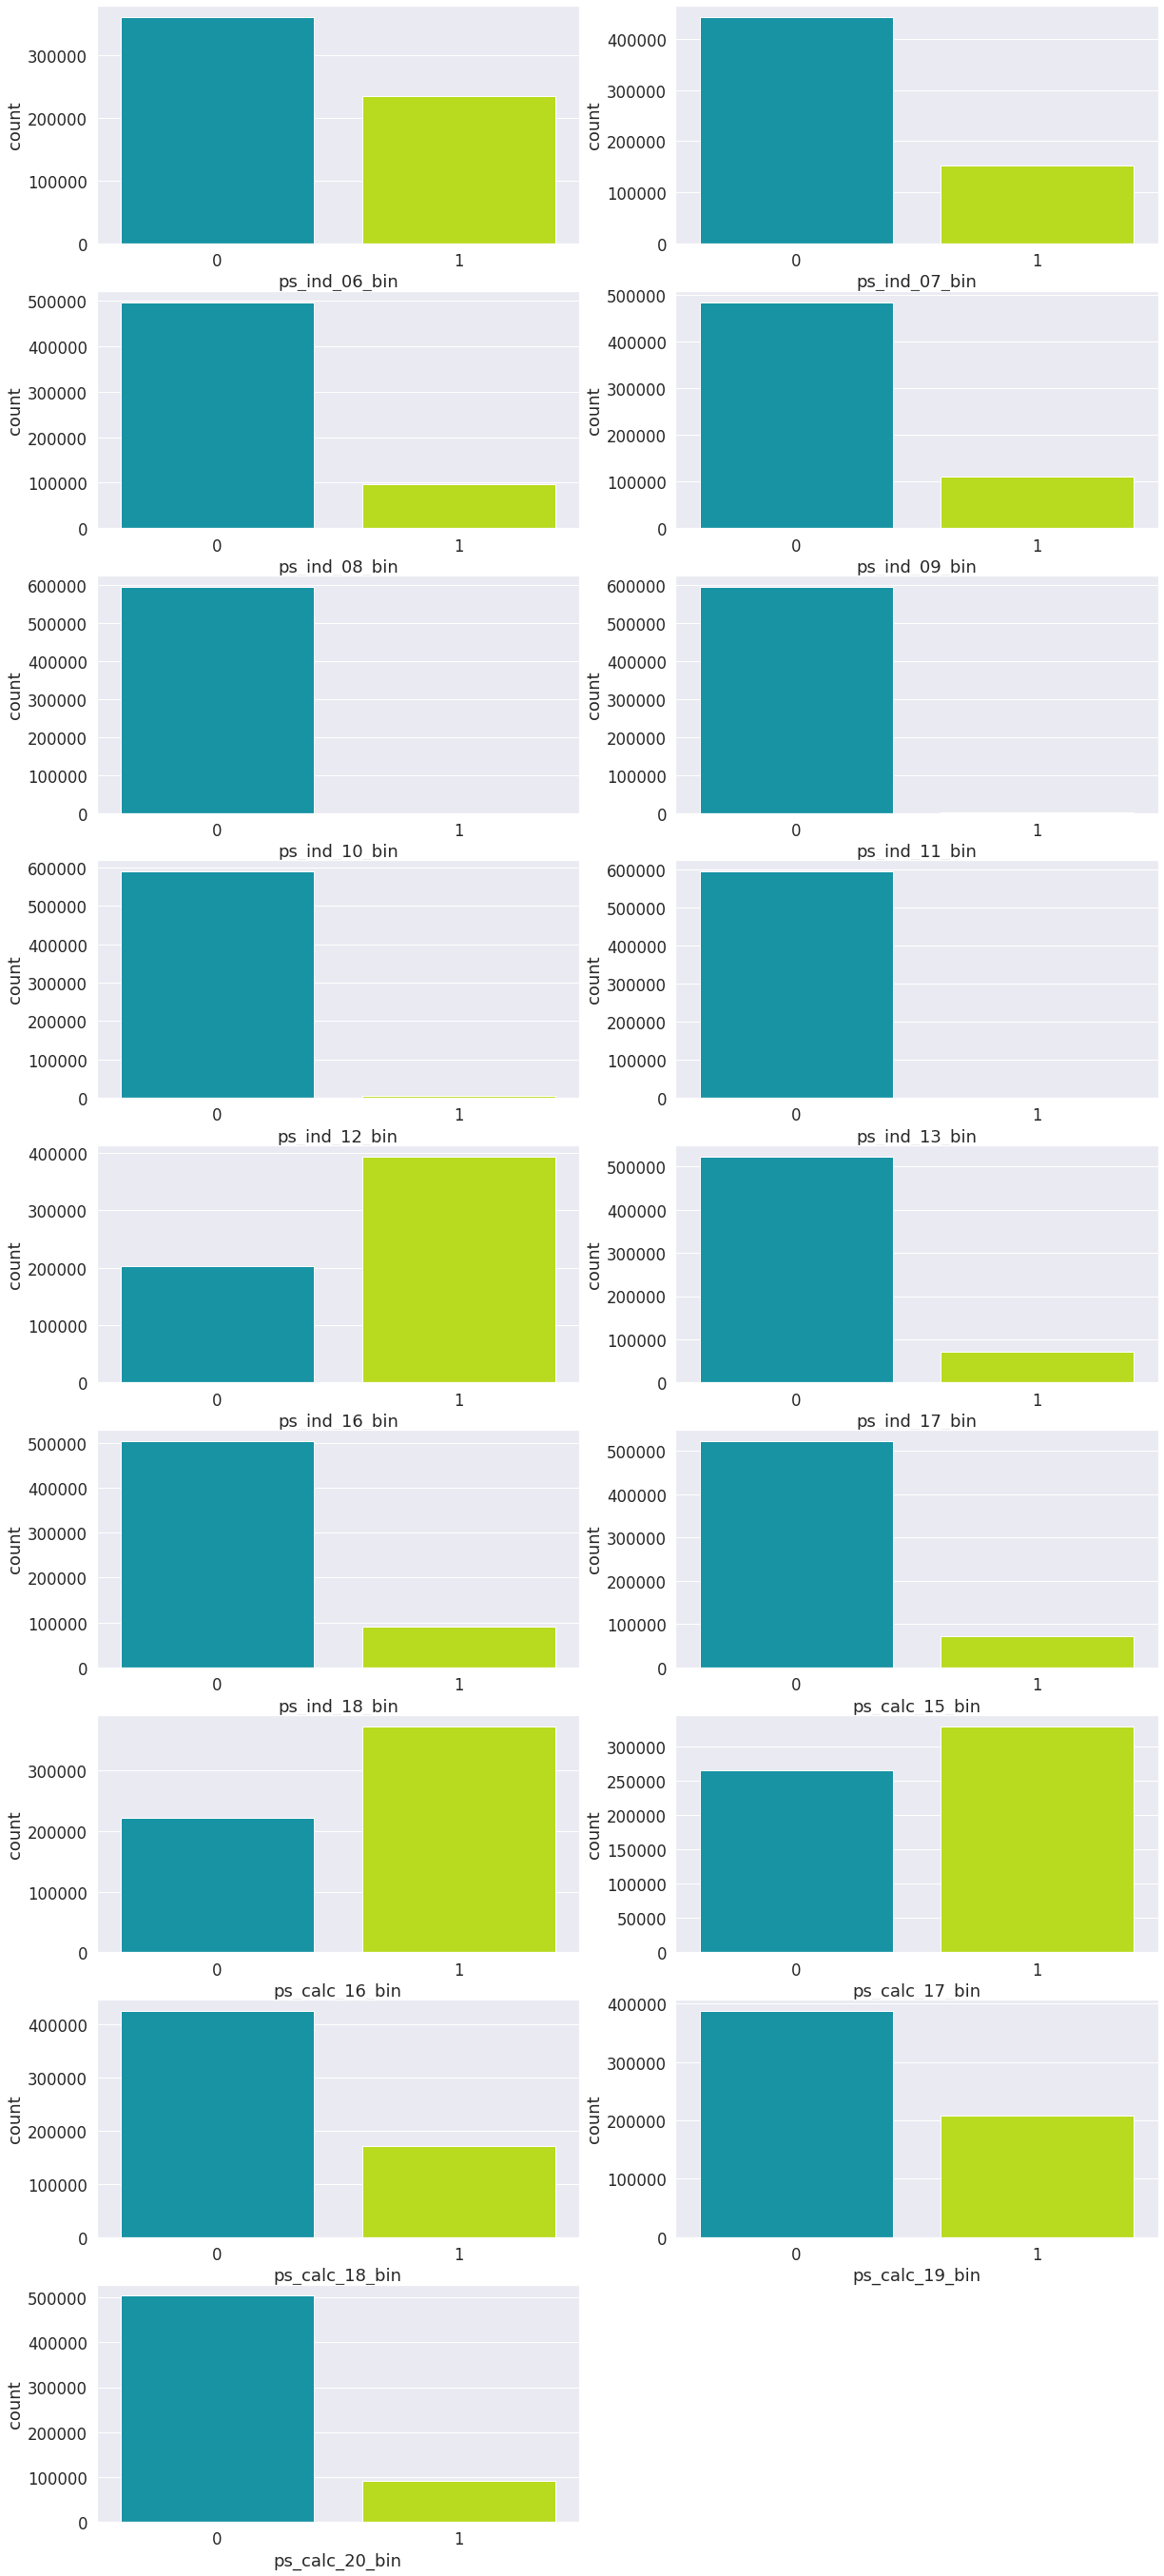

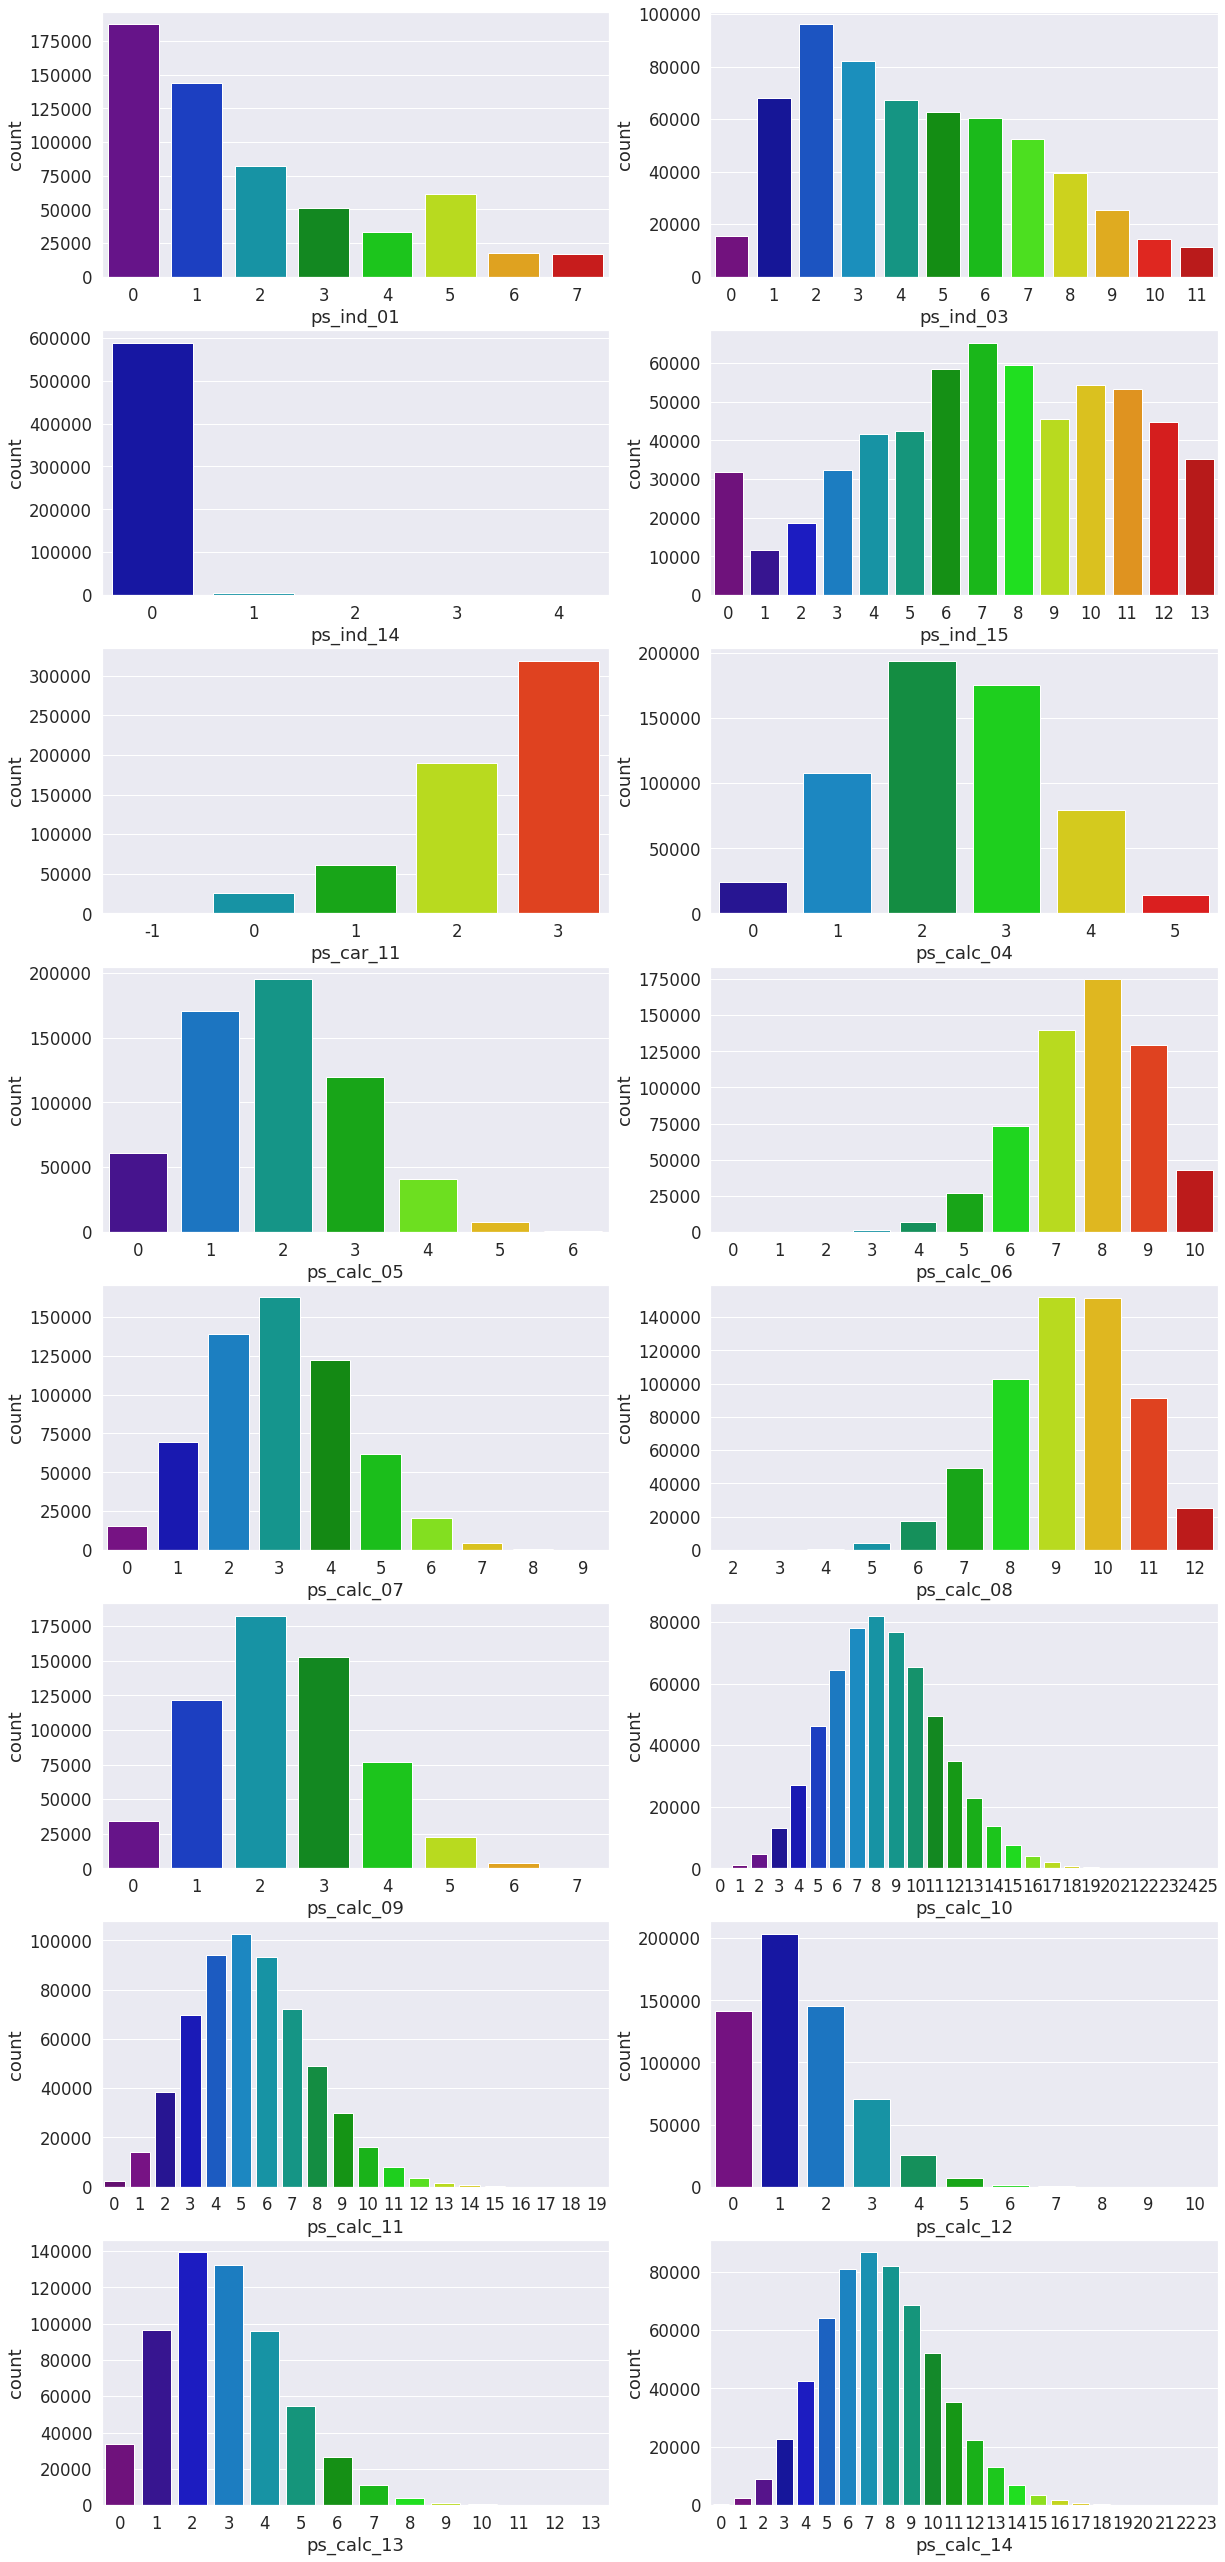

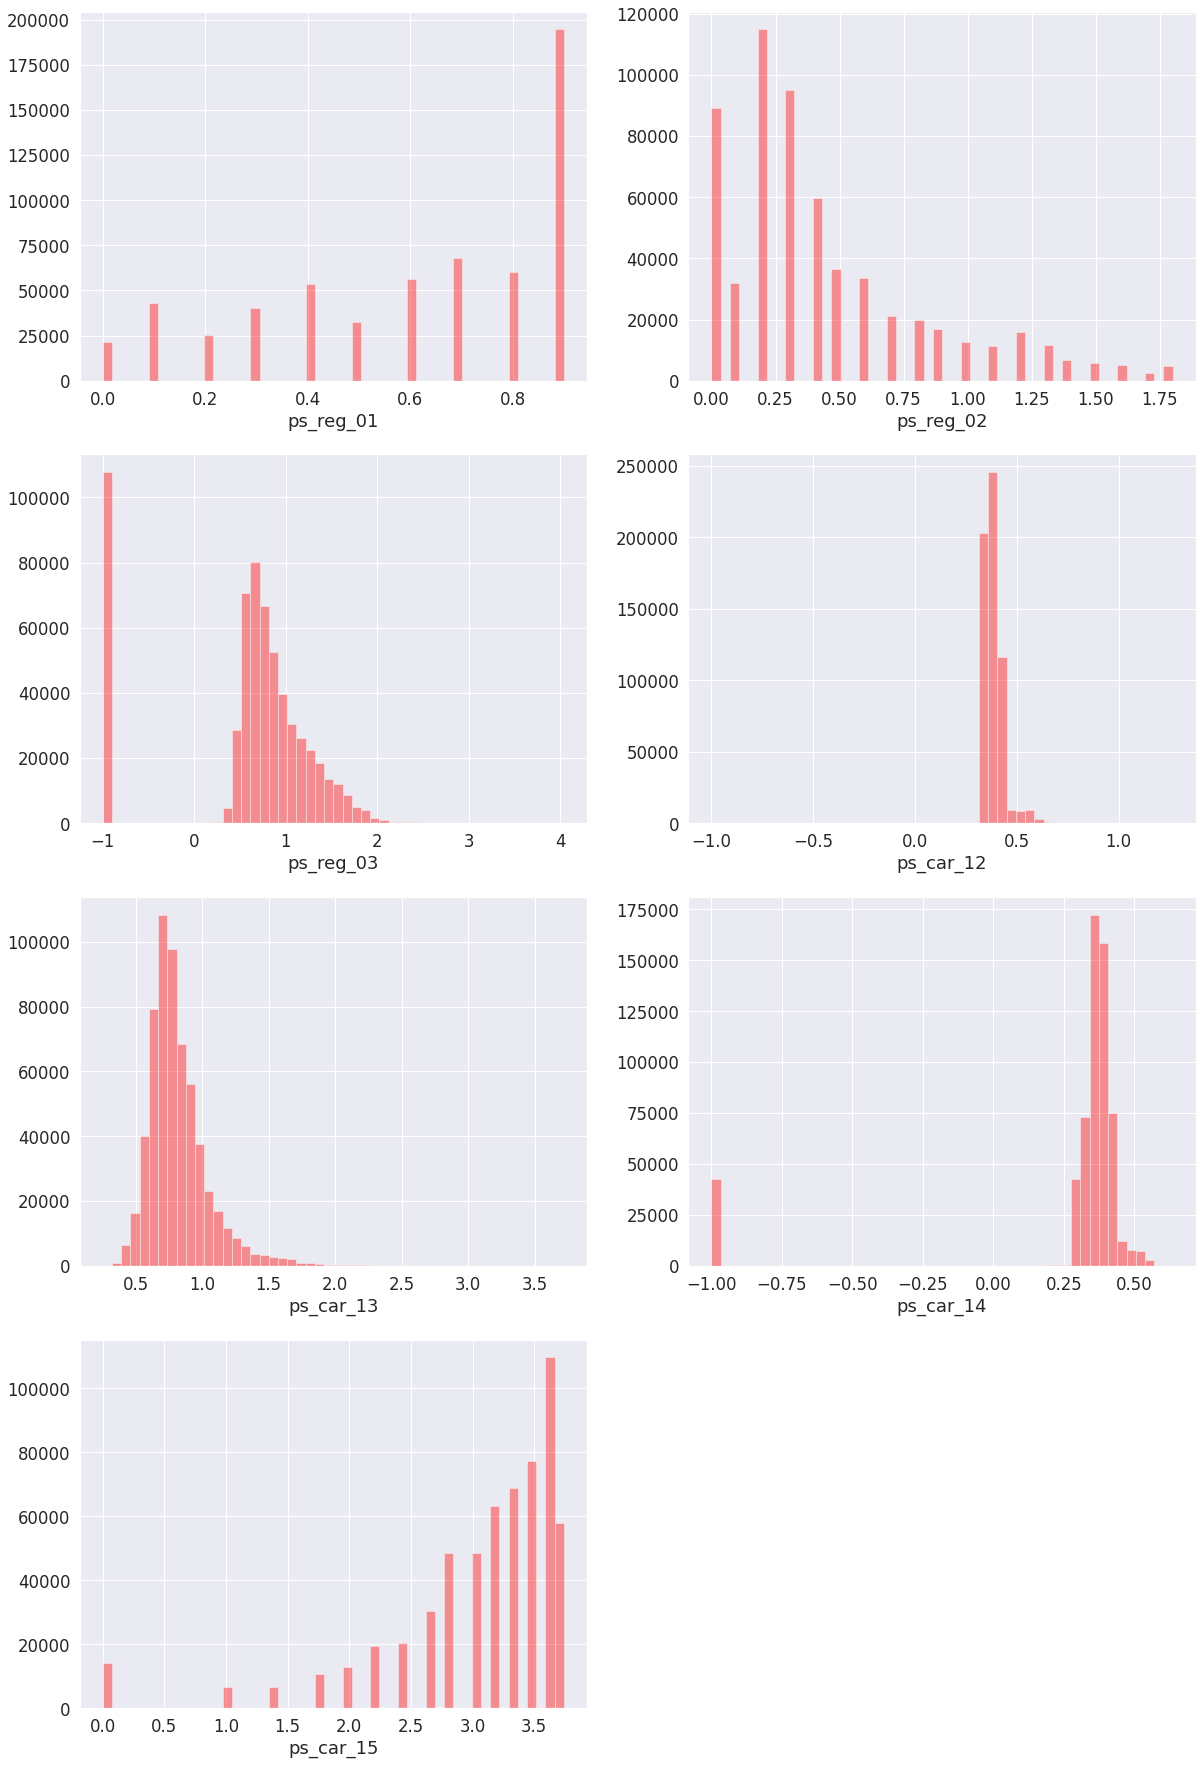

------------------------------------------
LGBMClassifier(random_state=42) 
results:
accuracy: 0.9631477701334812, recall: 0.0, f1-score: 0.0
Confusion matrix [[114656      2]
 [  4385      0]]
gini score 0.27687964323945646
Processing time 6.178940773010254 s
------------------------------------------
[19:22:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
         

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [9]:
##Test and train data

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

df_train = pd.read_csv('../input/porto-seguro-safe-driver-prediction/train.csv')
df_test = pd.read_csv('../input/porto-seguro-safe-driver-prediction/test.csv')
print('train data size', df_train.shape)
print('test data size', df_test.shape)
display(df_train.head())
display(df_test.head())

#Target labels
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_palette("Paired")
sns.set(font_scale=1.5)
plt.figure()
sns.countplot(df_train['target'],palette='nipy_spectral')
plt.show()

#Missing values
print('Nan values =', df_train.isnull().sum().sum())
df_missing_train = pd.DataFrame({'column':df_train.columns, 'missing(%)':((df_train==-1).sum()/df_train.shape[0])*100})
df_missing_test = pd.DataFrame({'column':df_test.columns, 'missing(%)':((df_test==-1).sum()/df_test.shape[0])*100})

df_missing_train_nl = df_missing_train.nlargest(7, 'missing(%)')
df_missing_test_nl = df_missing_test.nlargest(7, 'missing(%)')
sns.set_palette(sns.color_palette('nipy_spectral'))
plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_train_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in training set')
plt.show()
plt.figure(figsize=(16,6))
sns.barplot(data= df_missing_test_nl, x='column', y='missing(%)',palette='nipy_spectral')
plt.title('Missing values (%) in test set')
plt.show()

#TO better observe the frequency of missing values, we are using heatmap to visualize all the features.

plt.figure(figsize=(18,10))
sns.heatmap(df_train==-1, cmap='gray', cbar=False)
plt.title('Missing values in training set')
plt.show()

#Exploring features
#We will first devide the features into different types of categorical, binary, ordinal and continous numerical and then visualize all of them. We will see different patterns which are not really meaningful because we do not know the real names of the labels.

#Categorical features
#figures shows the frequency of each label in categorical and binary features.
features = df_train.columns.tolist()
cat_features = [c for c in features if 'cat' in c]
bin_features = [b for b in features if 'bin' in b]
cat_features_df = pd.DataFrame({'Categorical features': cat_features})
bin_features_df = pd.DataFrame({'Binary features': bin_features})

n_row = len(cat_features)
n_col = 2   
n_sub = 1   
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(cat_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x= df_train[cat_features[i]],palette='nipy_spectral')
    n_sub+=1
plt.show()

n_row = len(bin_features)
n_col = 2   
n_sub = 1      
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(bin_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x= df_train[bin_features[i]],palette='nipy_spectral')
    n_sub+=1   
plt.show()

#Ordinal features
#Features which are not categorical or binary are either numerical or ordinal. Ordinal feature can be something like the model year of the car. For example, when comparing 2011 and 2016 models of the same make, the order matters.
int_features = df_train.select_dtypes(include=['int64']).columns.tolist()

ordinal_features = [o for o in int_features if ('cat' not in o and 'bin' not in o and 'id' not in o and 'target' not in o )]
ord_features_df = pd.DataFrame({'Ordinal features': ordinal_features})

n_row = len(ordinal_features)
n_col = 2   
n_sub = 1      
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(ordinal_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.countplot(x= df_train[ordinal_features[i]],palette='nipy_spectral')
    n_sub+=1   
plt.show()
#Numerical continuous features¶
#We will visualize the continous features with distplots:

cont_features = df_train.select_dtypes(include=['float64']).columns.tolist()
cont_features_df = pd.DataFrame({'Numerical Continuous features': cont_features})
cont_features.remove('ps_calc_01')
cont_features.remove('ps_calc_02')
cont_features.remove('ps_calc_03')

n_row = len(cont_features)
n_col = 2   
n_sub = 1      
fig = plt.figure(figsize=(20,30))
plt.subplots_adjust(bottom=-0.2,top=1.2)
for i in range(len(cont_features)):
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(df_train[cont_features[i]], kde=False,color='Red')
    n_sub+=1   
plt.show()

#Training three simple models
#First, we will train three models of random forest, xgboost and lightgbm to see how is their performance. At this point, there is no change to the features (we just simply drop id column).
X_train = df_train.drop(['id', 'target'], axis=1)
y_train = df_train['target']

from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score, roc_auc_score
from time import time

def metrics(true, preds):
    accuracy = accuracy_score(true, preds)
    recall = recall_score(true, preds)
    f1score = f1_score(true, preds)
    cf = confusion_matrix(true, preds)
    print('accuracy: {}, recall: {}, f1-score: {}'.format(accuracy, recall, f1score))
    print('Confusion matrix', cf)

def gini(true, preds):
    res = 2* roc_auc_score(true, preds) - 1
    return res

X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

def test_clfs(clfs):
    for clf in clfs:
        print('------------------------------------------')
        start = time()
        clf = clf(random_state=42)
        clf.fit(X_tr, y_tr)
        y1_pred = clf.predict(X_te)
        y1_pred_prob = clf.predict_proba(X_te)
        print(str(clf), '\nresults:')
        metrics(y_te, y1_pred)
        print('gini score', gini(y_te, y1_pred_prob[:, 1]))
        end = time()
        print('Processing time', end-start,'s')

classifiers = [LGBMClassifier, XGBClassifier, RandomForestClassifier]
test_clfs(classifiers)

#Dealing with imbalance dataset
#We will train our model with the transformed data. The transformations are random undersampling, random oversampling and SMOTE over sampling.

#Undersampling and Oversampling

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sm_methods = [SMOTE,RandomUnderSampler,RandomOverSampler]
clf = LGBMClassifier(random_state=42)
for sm in sm_methods:
    print('------------------------------------------')
    sm = sm(random_state=42)
    start = time()
    X_train_resampled, y_train_resampled = sm.fit_sample(X_tr, y_tr)
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_te)
    y_pred_prob = clf.predict_proba(X_te)
    print(str(sm), 'results:')
    print('training resampled shape', X_train_resampled.shape)
    print('value counts in each class', y_train_resampled.value_counts())
    metrics(y_te, y_pred)
    gini_score = gini(y_te, y_pred_prob[:, 1])
    print('Normalized gini score', gini_score)
    end = time()
    print('Processing time', end-start,'s')
    
#Train and validate (Stratified KFold)
#Before hyperparameter tuning, let's train our simple model with cross-validation sets. We will use StratifiedKFold to make sure we have same ratio of classes in each cross-val set.

from sklearn.model_selection import StratifiedKFold, cross_val_predict

cv = StratifiedKFold(n_splits=5)
scores_gini = []

for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    clf = LGBMClassifier(random_state=42)
    clf.fit(train, target_train)
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('gini score:', gini_score)
    scores_gini.append(gini_score)
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))


# Hyperparameter tuning
#We are going to search among these parameters for our lightgbm classifiers:

#subsample = [0.5, 0.7, 0.9]
#num_leaves = [10, 12, 15, 20, 25, 30]
#learning_rate = [0.1, 0.15, 0.2]
#n_estimators = [50, 100, 150, 200]
#min_child_weight = [0.01, 0.1, 1, 10, 50, 100, 150, 200]
#min_child_samples = [5, 10, 15, 20, 25]
#Before search, we encode our categorial features into one hot format

df_train = pd.read_csv('../input/porto-seguro-safe-driver-prediction/train.csv')
X_train = df_train.drop(['id', 'target'], axis=1)
y_train = df_train['target']
features = df_train.columns.tolist()
cat_features = [c for c in features if 'cat' in c]
X_train = pd.get_dummies(X_train, columns=cat_features, prefix_sep='_', drop_first=True)
best_params = {'learning_rate': 0.1, 'min_child_samples': 5, 'min_child_weight': 100, 'n_estimators': 100, 'num_leaves': 20, 'subsample': 0.5}
print('best parameters', best_params)

#Now we train and test again with new features and tuned hyperparameters
scores_gini = []
for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    clf = LGBMClassifier(random_state=42, n_jobs=-1)
    clf.set_params(**best_params)
    clf.fit(train, target_train)
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('gini score:', gini_score)
    scores_gini.append(gini_score)

print('mean gini_score: {}'.format(np.mean(scores_gini)))

#Well, we increased our mean normalized gini score on cross-validation sets to 0.281.

pd.set_option('display.max_columns', None)
y_preds = y_val_pred_prob[:,1]
results = pd.DataFrame({'target_true':target_val , 'target_pred': y_preds})
b = results.nlargest(10, columns='target_pred')
b2 = results.nlargest(1000, columns='target_pred')
c = results.nsmallest(1000, columns='target_pred')
c_counts_1 = (c['target_true']==1).sum()
b2_counts_1 =  (b2['target_true']==1).sum()
print('Numeber of 1s in 1000 smallest probabilities:', c_counts_1)
print('Number of 1s in 1000 largest probabilities:', b2_counts_1 )
display(b)
display(val.loc[b.index])

#Next we are going to see the feature importances from the model's perspective.
from sklearn.feature_selection import SelectFromModel

features = train.columns
importances = clf.feature_importances_
indices = np.argsort(clf.feature_importances_)[::-1]
imp_features= pd.DataFrame({'feature':features[indices], 'importance':importances[indices]})
display(imp_features)
imp_features_50smallest = imp_features.nsmallest(50, 'importance')
features_to_drop = imp_features_50smallest['feature'].tolist()
imp_features_10large = imp_features.nlargest(10, 'importance')
plt.figure(figsize=(15,8))
sns.barplot(data=imp_features_10large, x='feature', y='importance',palette='nipy_spectral')
plt.show()

#Now, let's see how the top 10 data differ in these features with each other.

print(imp_features_10large)
display(val.loc[b.index, imp_features_10large.feature])

#We will replace missing values of ps_reg_03 and ps_car_14 with their median value. We also drop cat_car_05 due its many missing values. Indeed, it increases the score.

features = X_train.columns.tolist()
cat_car_05 = [c for c in features if 'car_05_cat' in c]
calc_features = [c for c in features if 'calc' in c]
X_train.drop(calc_features, axis=1, inplace=True)
X_train.drop(cat_car_05, axis=1, inplace=True)
X_train['ps_reg_03'].replace(-1, X_train['ps_reg_03'].median(), inplace=True)
X_train['ps_car_14'].replace(-1, X_train['ps_car_14'].median(), inplace=True)

scores_gini = []
for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    clf = LGBMClassifier(random_state=42, n_jobs=-1)
    clf.set_params(**best_params)
    clf.fit(train, target_train)
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('gini score:', gini_score)
    scores_gini.append(gini_score)
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))

y_preds = y_val_pred_prob[:,1]
results = pd.DataFrame({'target_true':target_val , 'target_pred': y_preds})
b = results.nlargest(10, columns='target_pred')
b2 = results.nlargest(1000, columns='target_pred')
c = results.nsmallest(1000, columns='target_pred')
c_counts_1 = (c['target_true']==1).sum()
b2_counts_1 =  (b2['target_true']==1).sum()
print('Numeber of 1s in 1000 smallest probabilities:', c_counts_1)
print('Number of 1s in 1000 largest probabilities:', b2_counts_1 )

# Same process to df_test before submission
df_test = pd.read_csv('../input/porto-seguro-safe-driver-prediction/test.csv')
X_test = df_test.drop('id', axis=1)
X_test = pd.get_dummies(X_test, columns=cat_features, prefix_sep='_', drop_first=True)
X_test.drop(calc_features, axis=1, inplace=True)
X_test.drop(cat_car_05, axis=1, inplace=True)
X_test['ps_reg_03'].replace(-1, X_test['ps_reg_03'].median(), inplace=True)
X_test['ps_car_14'].replace(-1, X_test['ps_car_14'].median(), inplace=True)
assert(X_train.shape[1]==X_test.shape[1])
clf.fit(X_train, y_train)

# Submission 
preds =  clf.predict_proba(X_test)[:,1]
df_subm = pd.read_csv('../input/porto-seguro-safe-driver-prediction/sample_submission.csv')
df_subm.loc[:,'target'] = preds
display(df_subm)
df_subm.to_csv('submission.csv', index=False)